In [676]:
import pandas as pd
# Load datasets
macro_data = pd.read_csv("../data/processed_data/macro_economic.csv")
events_Holidays_data = pd.read_csv("../data/processed_data/events_Holidays_data.csv")
weather_data = pd.read_csv("../data/processed_data/weather_data.csv")
train_data = pd.read_csv("../data/processed_data/train.csv")
test_data = pd.read_csv("../data/processed_data/Submission.csv")
kaggle_submission_form = pd.read_csv("../data/processed_data/Kaggle_Submission_Format.csv")

In [677]:
train_data['date'] = pd.to_datetime(train_data[['Year', 'Month']].assign(day=1))
train_data['date'] = train_data.date.dt.to_period('M')
train_data.drop(columns=['Year', 'Month'], inplace=True)
train_data.fillna(0,inplace=True)
train_data.set_index('date', inplace=True)
train_data.head(10)

,ProductCategory,Sales(In ThousandDollars)
date,,
2009-01,WomenClothing,1755.0
2009-01,MenClothing,524.0
2009-01,OtherClothing,936.0
2009-02,WomenClothing,1729.0
2009-02,MenClothing,496.0


#  Split the dataset by the clothing category

In [477]:


women_clothing_data = train_data[train_data['ProductCategory'] == 'WomenClothing']
women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
women_clothing_data.fillna(method='bfill',inplace=True)
men_clothing_data = train_data[train_data['ProductCategory'] == 'MenClothing']
men_clothing_data.drop(columns=['ProductCategory'], inplace=True)
men_clothing_data.fillna(method='bfill',inplace=True)
other_clothing_data = train_data[train_data['ProductCategory'] == 'OtherClothing']
other_clothing_data.drop(columns=['ProductCategory'], inplace=True)
other_clothing_data.fillna(method='bfill',inplace=True)


idx_women = women_clothing_data.index[women_clothing_data['Sales(In ThousandDollars)'] ==0]
idx_men = men_clothing_data.index[men_clothing_data['Sales(In ThousandDollars)'] ==0]
idx_other = other_clothing_data.index[other_clothing_data['Sales(In ThousandDollars)'] ==0]


/tmp/ipykernel_137204/885686471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
/tmp/ipykernel_137204/885686471.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  women_clothing_data.fillna(method='bfill',inplace=True)
/tmp/ipykernel_137204/885686471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_clothing_data.fillna(method='bfill',inplace=True)
/tmp/ipykernel_137204/885686471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [478]:
train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()),
                                               inplace=True)

/tmp/ipykernel_137204/2795247986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()),


# Load and format supplemetary data

In [479]:
events_Holidays_data['MonthDate'] = events_Holidays_data['MonthDate'].astype(str)
events_Holidays_data['Month'] = events_Holidays_data['MonthDate'].apply(lambda x: x.split('-')[1])
events_Holidays_data['Month'] = events_Holidays_data['Month'].astype(int)
events_Holidays_data.drop(events_Holidays_data.index[events_Holidays_data['Event'] == "'New Year's Day' observed"], inplace=True)

events_Holidays_data.drop(columns=['MonthDate', 'Event'], inplace=True)

events_Holidays_data['date'] = pd.to_datetime(events_Holidays_data[['Year', 'Month']].assign(day=1))
events_Holidays_data['date'] = events_Holidays_data.date.dt.to_period('M')
events_Holidays_data.drop(columns=['Year', 'Month'], inplace=True)
events_Holidays_data.set_index('date', inplace=True)

In [480]:
events_holidays_dummies = pd.get_dummies(data=events_Holidays_data, columns=['DayCategory'])
events_holidays_count = events_holidays_dummies.groupby('date').sum()
events_holidays_count.rename(columns={'DayCategory_Event': 'Events', 'DayCategory_Federal Holiday': 'Holidays'}, inplace=True)

In [481]:
weather_data = pd.read_excel('../data/raw_data/WeatherData.xlsx', sheet_name=None)
for key in weather_data.keys():
    weather_data[key]['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
    weather_data[key]['Year'] = key
    weather_data[key]['date'] = pd.to_datetime(weather_data[key][['Year', 'Month', 'Day']], format='%y%m%d')
    weather_data[key]['date'] = weather_data[key].date.dt.to_period('M')
    weather_data[key]['WeatherEvent'].replace(to_replace=r'^[A-Za-z]', value=1, regex=True, inplace=True)
    weather_data[key]['WeatherEvent'].fillna(0, inplace=True)
    weather_data[key]['WeatherEvent'].astype('int64')
    weather_data[key].fillna(0, inplace=True)
    weather_data[key] = weather_data[key][['date', 'Temp avg (°C)', 'Dew Point avg (°C)', 'Humidity\xa0(%) avg', 'Sea Level Press.\xa0(hPa) high', 'Visibility\xa0(km) high', \
                                       'WeatherEvent','Wind\xa0(km/h) avg']]
    weather_data[key]['Temp avg (°C)'] = weather_data[key]['Temp avg (°C)'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Dew Point avg (°C)'] = weather_data[key]['Dew Point avg (°C)'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Humidity\xa0(%) avg'] = weather_data[key]['Humidity\xa0(%) avg'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Sea Level Press.\xa0(hPa) high'] = weather_data[key]['Sea Level Press.\xa0(hPa) high'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Visibility\xa0(km) high'] = weather_data[key]['Visibility\xa0(km) high'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Wind\xa0(km/h) avg'] = weather_data[key]['Wind\xa0(km/h) avg'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key].set_index('date', inplace=True)
    weather_event = weather_data[key].groupby(['date'])['WeatherEvent'].sum()

    weather_data[key] = weather_data[key].drop(columns=['WeatherEvent']).groupby('date').median()

    weather_data[key]['WeatherEvent'] = weather_event


/tmp/ipykernel_137204/466781037.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data[key]['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/466781037.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

In [483]:
weather_concat = pd.concat([weather_data[key] for key in weather_data.keys()])

In [482]:
macro_economic_data = pd.read_excel('../data/raw_data/macro_economic.xlsx')
macro_economic_data['Year'] = macro_economic_data['Year-Month'].apply(lambda x: int(x.split('-')[0]))
macro_economic_data['Month'] = macro_economic_data['Year-Month'].apply(lambda x: x.split('-')[1])
macro_economic_data['Month'] = macro_economic_data['Month'].apply(lambda x: x.strip())
macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
macro_economic_data['date'] = pd.to_datetime(macro_economic_data[['Year', 'Month']].assign(day=1))
macro_economic_data['date'] = macro_economic_data.date.dt.to_period('M')
macro_economic_data.drop(columns=['Year-Month', 'PartyInPower', 'Year', 'Month', 'AdvertisingExpenses (in Thousand Dollars)'], inplace=True)
macro_economic_data.set_index('date', inplace=True)

/tmp/ipykernel_137204/2646237942.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/2646237942.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

In [484]:
macro_economic_data

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
date,,,,,,,,,,,,,,,
2009-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
2009-02,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
2009-03,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
2009-04,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225
2009-05,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08,18741.599947,16797.206610,264.160,4.9,12.51,9.64,25.52,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
2016-09,18840.309646,16852.562745,264.602,4.9,12.51,9.64,25.74,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
2016-10,18740.780023,16725.460098,264.738,4.8,12.51,9.64,26.04,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425


In [452]:
combined = macro_economic_data.merge(weather_concat, on='date')
combined = combined.merge(events_holidays_count, on='date', how='left')
combined.fillna(0, inplace=True)

# Create functions for Mutual Information to select features

In [485]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

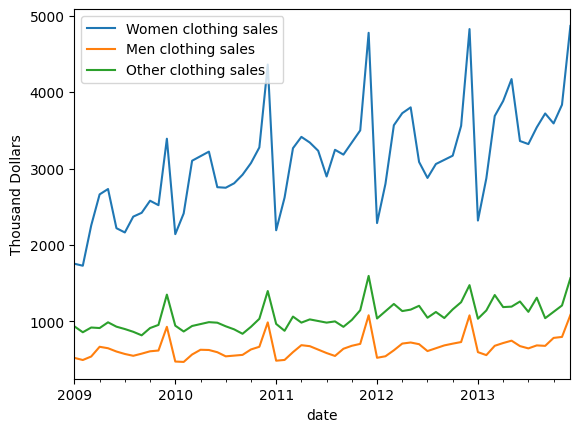

In [486]:
ax = women_clothing_data.drop(idx_women).plot(y='Sales(In ThousandDollars)', label='Women clothing sales', ylabel='Thousand Dollars')
men_clothing_data.drop(idx_men).plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_data.drop(idx_other).plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()

# Explore the trend on the Women Clothing example

In [510]:
women_clothing_train = women_clothing_data.loc['2009-01-01':'2012-12-01']
women_clothing_val = women_clothing_data.loc['2013-01-01':'2013-12-01']

# Use DeterministicProcess to engineer time dummies for modeling trend with Lienar Regression

In [511]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=women_clothing_train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
# out_sample features used for forecasting
X_fore = dp.out_of_sample(steps=12)

In [512]:
X.drop(idx_women, inplace=True)

In [515]:
X.head()

,const,trend,trend_squared
date,,,
2009-01,1.0,1.0,1.0
2009-02,1.0,2.0,4.0
2009-03,1.0,3.0,9.0
2009-04,1.0,4.0,16.0
2009-05,1.0,5.0,25.0


In [516]:
from sklearn.linear_model import LinearRegression
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

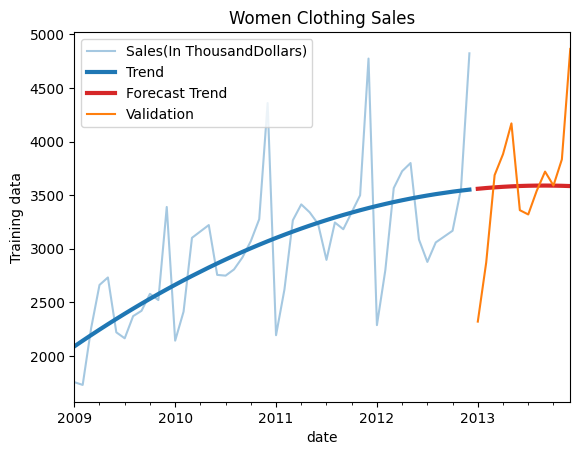

In [518]:
import matplotlib.pyplot as plt

# Plotting training data, trend, and forecast
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='Training data')
y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
y_fore.plot(ax=ax, linewidth=3, label="Forecast Trend", color='C3')

# Plotting validation data
women_clothing_val.plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation')

# Adding legend
ax.legend()

# Show the plot
plt.show()


# Model seasonality

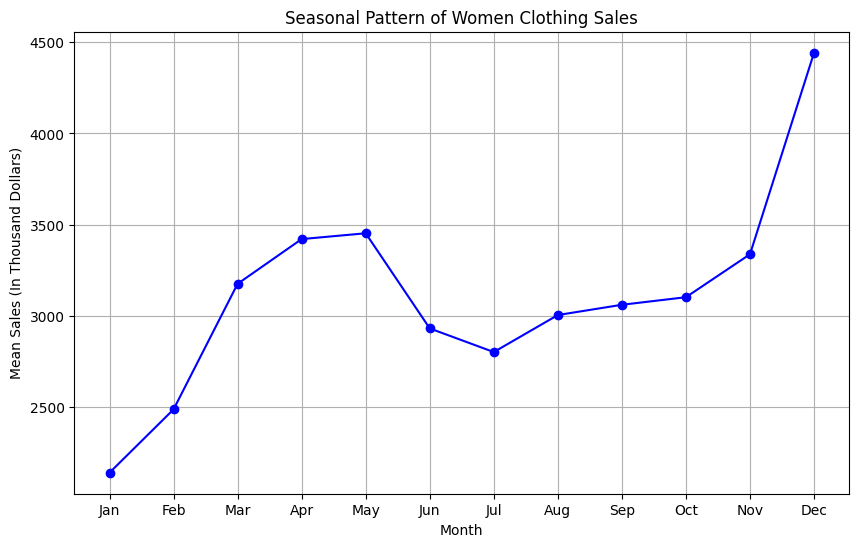

In [522]:
import pandas as pd
import matplotlib.pyplot as plt
X = women_clothing_data.drop(idx_women)
X['year'] = X.index.year
X['month'] = X.index.month
y = X['Sales(In ThousandDollars)']  # Assuming this is how y is defined

# Group by month and calculate mean sales
monthly_mean = X.groupby('month')['Sales(In ThousandDollars)'].mean()

# Plotting the seasonal pattern
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-', color='b')
plt.title('Seasonal Pattern of Women Clothing Sales')
plt.xlabel('Month')
plt.ylabel('Mean Sales (In Thousand Dollars)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# The time series shows seasonal behavior that can be described by adding seasonal and Fourier terms to the function

In [523]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=women_clothing_train.index,
    constant=True,
    order=2,
    seasonal=True,  
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample() 
X_fore = dp.out_of_sample(steps=12)
X.drop(idx_women, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [524]:
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

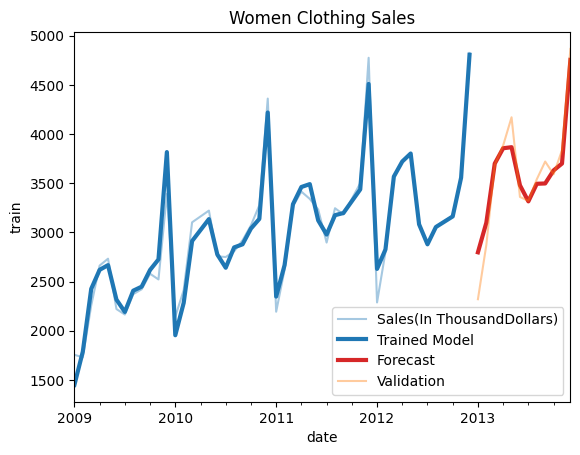

In [525]:
import matplotlib.pyplot as plt

# Plotting the data and forecasts
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='train')
y_pred.plot(ax=ax, linewidth=3, label="Trained Model", color='C0')
y_fore.plot(ax=ax, linewidth=3, label="Forecast", color='C3')
women_clothing_val.plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation', alpha=0.4)

# Adding legend and showing the plot
ax.legend()
plt.show()


In [526]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))
print('RSME validation: ', np.sqrt(mean_squared_error(y_fore, women_clothing_val['Sales(In ThousandDollars)'])))

RSME train:  132.3096844376603
RSME validation:  197.88114599342288


<Axes: title={'center': 'Residuals'}, xlabel='date'>

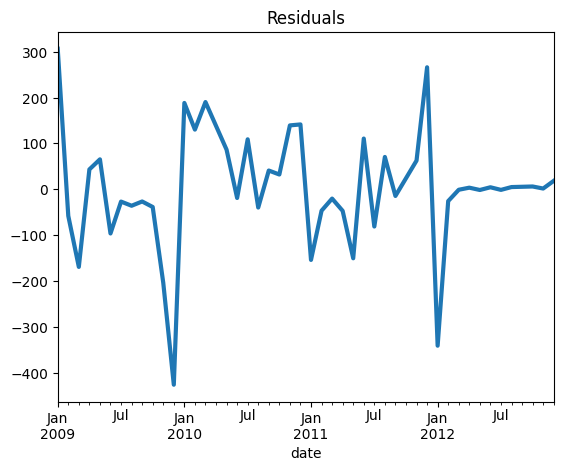

In [527]:
y_resid = y - y_pred
y_resid.plot(linewidth=3, title="Residuals", color='C0')

#  Hybrid model class

In [590]:
class Hybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2

In [598]:
def fit(self, X_1, X_2, y):
   
    self.model_1.fit(X_1, y)

    y_fit = pd.Series(
        self.model_1.predict(X_1), 
        index=X_1.index,
    )

    y_resid = y - y_fit

    self.model_2.fit(X_2, y_resid)

    self.y_fit = y_fit
    self.y_resid = y_resid

# Add method to class
Hybrid.fit = fit

In [599]:
def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        self.model_1.predict(X_1), 
        index=X_1.index
    )
    y_pred = y_pred.stack().squeeze()  # wide to long

    y_pred += self.model_2.predict(X_2)
    
    return y_pred.unstack()  # long to wide


# Add method to class
Hybrid.predict = predict

# Use the created class for forecasting Women Clothing Sales with Linear Regression (trend+seasonality) and Random Forest Regression on the selected fetures

In [600]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=women_clothing_train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
    seasonal=True,
    additional_terms=[fourier]
)
# `in_sample` creates features for the dates given in the `index` argument
X_1 = dp.in_sample()
# out_sample features used for forecasting
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_women, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [601]:
mi_scores = make_mi_scores(combined['2009-01':'2013-12'].drop(idx_women), women_clothing_data['Sales(In ThousandDollars)'].drop(idx_women))
mi_scores[0:8]

Monthly Real GDP Index (inMillion$)               0.443470
Monthly Nominal GDP Index (inMillion$)            0.423520
CPI                                               0.365649
unemployment rate                                 0.340434
Cotton Monthly Price - US cents per Pound(lbs)    0.269226
Average upland planted(million acres)             0.258926
Earnings or wages  in dollars per hour            0.246011
Events                                            0.212774
Name: MI Scores, dtype: float64

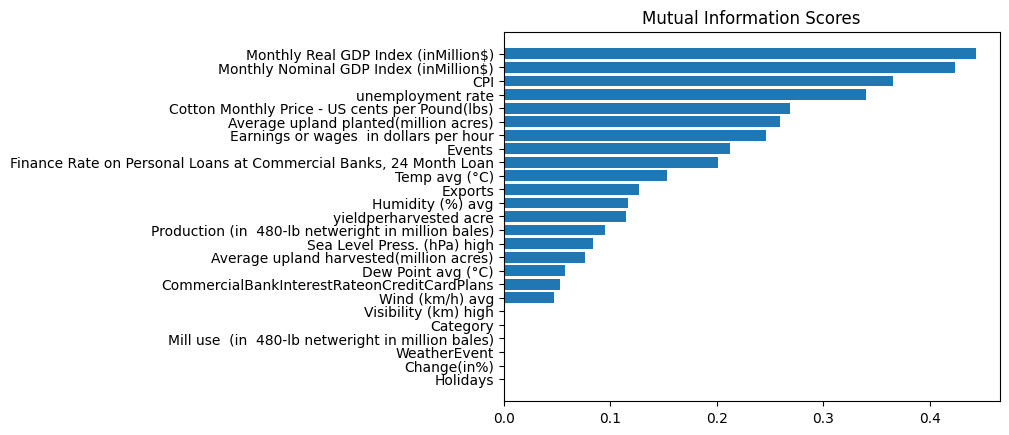

In [602]:
plot_mi_scores(mi_scores)

In [610]:
other_clothing_data.head()


,Sales(In ThousandDollars)
date,
2009-01,936.0
2009-02,859.0
2009-03,921.0
2009-04,914.0
2009-05,989.0


In [611]:
women_clothing_features_selected = combined[['Monthly Real GDP Index (inMillion$)', 'Monthly Nominal GDP Index (inMillion$)', 'CPI', 'unemployment rate', \
                                                            'Cotton Monthly Price - US cents per Pound(lbs)', 'Average upland planted(million acres)', 'Earnings or wages  in dollars per hour']]
women_clothing_features_train = women_clothing_features_selected.loc['2009-01':'2012-12']
women_clothing_features_test = women_clothing_features_selected.loc['2013-01':'2013-12']
X_2 = women_clothing_features_train
X_2_fore = women_clothing_features_test
X_2.drop(idx_women, inplace=True)

/tmp/ipykernel_137204/2821421284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_women, inplace=True)


# RF Regression for residuals

In [622]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [623]:
y =  women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)
model.fit(X_1,X_2,y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

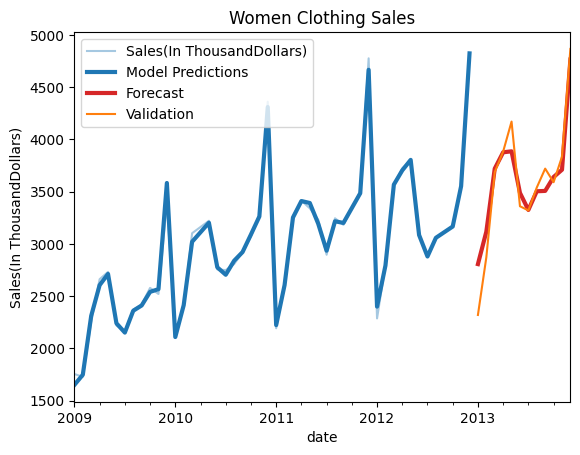

In [624]:
import matplotlib.pyplot as plt

# Assuming you have defined y, y_pred[0], y_fore[0], and women_clothing_val earlier

# Plotting
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='Sales(In ThousandDollars)')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Predictions", color='C0')
y_fore[0].plot(ax=ax, linewidth=3, label="Forecast", color='C3')
women_clothing_val['Sales(In ThousandDollars)'].plot(ax=ax, label='Validation')
ax.legend()

# Show plot
plt.show()


In [625]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))
print('RSME validation: ', np.sqrt(mean_squared_error(y_fore, women_clothing_val['Sales(In ThousandDollars)'])))

RSME train:  48.91822405485674
RSME validation:  197.97055141608894


#  XGBoost for residuals

In [626]:
from xgboost import XGBRegressor
model = Hybrid(
    model_1=LinearRegression(),
    model_2=XGBRegressor(),
)

In [627]:
y =  women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

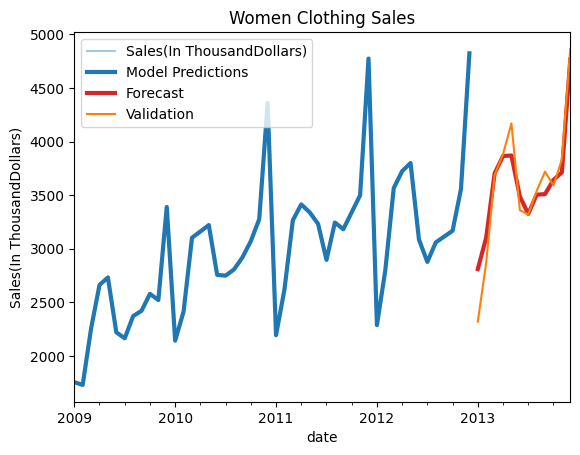

In [628]:
import matplotlib.pyplot as plt

# Assuming you have defined y, y_pred[0], y_fore[0], and women_clothing_val earlier

# Plotting
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='Sales(In ThousandDollars)')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Predictions", color='C0')
y_fore[0].plot(ax=ax, linewidth=3, label="Forecast", color='C3')
women_clothing_val.plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation')

# Adding legend
ax.legend()

# Show plot
plt.show()


In [630]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))
print('RSME validation: ', np.sqrt(mean_squared_error(y_fore, women_clothing_val['Sales(In ThousandDollars)'])))

RSME train:  0.0009109362666377172
RSME validation:  198.75421445958398


#  Repeat the analysis for the Men Clothing data

In [589]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
model = Hybrid(
    model_1=LinearRegression(),
    model_2=XGBRegressor(),
)

TypeError: Hybrid.__init__() got an unexpected keyword argument 'model_1'

In [571]:
class Hybrid:
    def __init__(self):
        # Initialize internal models
        self.model_1 = LinearRegression()
        self.model_2 = GradientBoostingRegressor()

    def fit(self, X_1, X_2, y):
        # Fit internal models
        self.model_1.fit(X_1, y)
        self.model_2.fit(X_2, y)

    def predict(self, X_1, X_2):
        # Predict using internal models
        pred_1 = self.model_1.predict(X_1)
        pred_2 = self.model_2.predict(X_2)
        
        # Combine predictions, e.g., averaging
        combined_pred = (pred_1 + pred_2) / 2
        return combined_pred


In [631]:
men_clothing_train = men_clothing_data.loc['2009-01':'2012-12']
men_clothing_val = men_clothing_data.loc['2013-01':'2013-12']

In [632]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=men_clothing_train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
    seasonal=True,
    #additional_terms=[fourier]
)
# `in_sample` creates features for the dates given in the `index` argument
X_1 = dp.in_sample()
# out_sample features used for forecasting
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_men, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [633]:
mi_scores = make_mi_scores(combined['2009-01':'2013-12'].drop(idx_men), men_clothing_df['Sales(In ThousandDollars)'].drop(idx_men))
mi_scores[0:8]

Dew Point avg (°C)                        0.394556
Temp avg (°C)                             0.339992
Events                                    0.235725
Monthly Real GDP Index (inMillion$)       0.187393
Exports                                   0.175733
Wind (km/h) avg                           0.156105
Monthly Nominal GDP Index (inMillion$)    0.147602
Sea Level Press. (hPa) high               0.138623
Name: MI Scores, dtype: float64

In [635]:
men_clothing_features_selected = combined[['Temp avg (°C)', 'Dew Point avg (°C)', 'Events']]
men_clothing_features_train = men_clothing_features_selected.loc['2009-01':'2012-12']
men_clothing_features_test = men_clothing_features_selected.loc['2013-01':'2013-12']
X_2 = men_clothing_features_train
X_2_fore = men_clothing_features_test
X_2.drop(idx_men, inplace=True)

/tmp/ipykernel_137204/1033090501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_men, inplace=True)


In [636]:
model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [637]:
y =  men_clothing_train['Sales(In ThousandDollars)'].drop(idx_men)
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

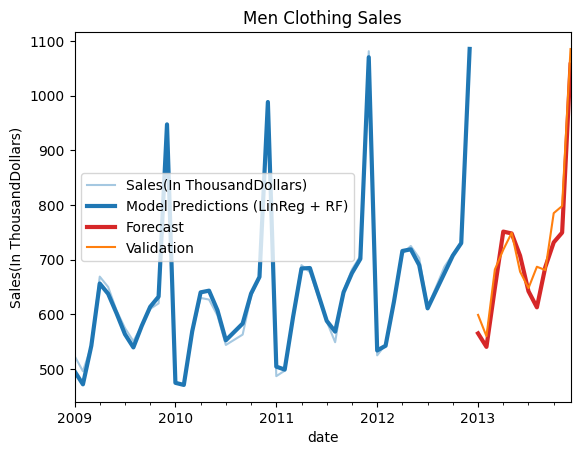

In [639]:
import matplotlib.pyplot as plt
ax = y.plot(alpha=0.4, title="Men Clothing Sales", ylabel='Sales(In ThousandDollars)')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Predictions (LinReg + RF)", color='C0')
y_fore[0].plot(ax=ax, linewidth=3, label="Forecast", color='C3')
men_clothing_val.plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation')

# Adding legend
ax.legend()

# Show plot
plt.show()


In [640]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))
print('RSME validation: ', np.sqrt(mean_squared_error(y_fore, men_clothing_val['Sales(In ThousandDollars)'])))

RSME train:  10.400242680024485
RSME validation:  36.75307759953564


#  For Other Clothing

In [641]:
other_clothing_train = other_clothing_data.loc['2009-01':'2012-12']
other_clothing_val = other_clothing_data.loc['2013-01':'2013-12']

In [642]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=other_clothing_train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
    seasonal=True,
    #additional_terms=[fourier]
)
# `in_sample` creates features for the dates given in the `index` argument
X_1 = dp.in_sample()
# out_sample features used for forecasting
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_other[0:3], inplace=True)
X_1_fore.drop(idx_other[-1], inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [643]:
mi_scores = make_mi_scores(combined['2009-01':'2013-12'].drop(idx_other), other_clothing_df['Sales(In ThousandDollars)'].drop(idx_other))
mi_scores[0:8]

Monthly Real GDP Index (inMillion$)            0.408693
Monthly Nominal GDP Index (inMillion$)         0.397435
Earnings or wages  in dollars per hour         0.394382
CPI                                            0.376002
Events                                         0.270559
yieldperharvested acre                         0.252717
unemployment rate                              0.248214
CommercialBankInterestRateonCreditCardPlans    0.212215
Name: MI Scores, dtype: float64

In [644]:
other_clothing_features_selected = combined[['Monthly Nominal GDP Index (inMillion$)', 'Monthly Real GDP Index (inMillion$)', 'Earnings or wages  in dollars per hour', \
                                                           'CPI', 'Events', 'unemployment rate', 'yieldperharvested acre']]

In [645]:
other_clothing_features_train = other_clothing_features_selected.loc['2009-01':'2012-12']
other_clothing_features_test = other_clothing_features_selected.loc['2013-01':'2013-12']
X_2 = other_clothing_features_train
X_2_fore = other_clothing_features_test

X_2.drop(idx_other[0:3], inplace=True)
X_2_fore.drop(idx_other[-1], inplace=True)

/tmp/ipykernel_137204/2940003665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_other[0:3], inplace=True)
/tmp/ipykernel_137204/2940003665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2_fore.drop(idx_other[-1], inplace=True)


In [646]:
model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [647]:
y =  other_clothing_train['Sales(In ThousandDollars)'].drop(idx_other[0:3])
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

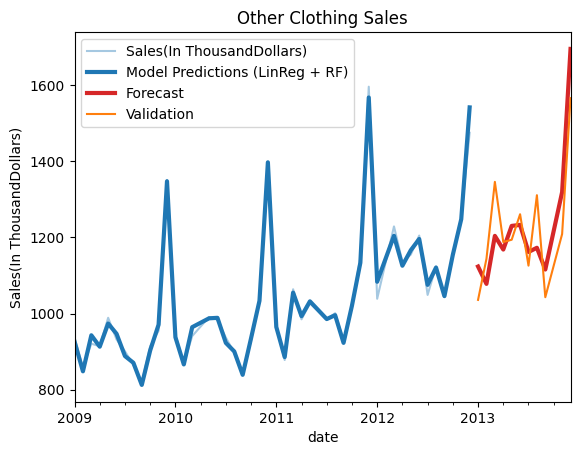

In [648]:
import matplotlib.pyplot as plt
# Plotting
ax = y.plot(alpha=0.4, title="Other Clothing Sales", ylabel='Sales(In ThousandDollars)')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Predictions (LinReg + RF)", color='C0')
y_fore[0].plot(ax=ax, linewidth=3, label="Forecast", color='C3')
other_clothing_val.drop(idx_other[-1]).plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation')

# Adding legend
ax.legend()

# Show plot
plt.show()


In [649]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))
print('RSME validation: ', np.sqrt(mean_squared_error(y_fore, other_clothing_val['Sales(In ThousandDollars)'].drop(idx_other[-1]))))

RSME train:  16.354126387898145
RSME validation:  90.00692182359562


# Final result

# Predicting Women Clothing Sales

In [651]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=women_clothing_data.index,
    constant=True,
    order=2,
    seasonal=True,  
    additional_terms=[fourier],
    drop=True,
)
X_1 = dp.in_sample() 
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_women, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [652]:
women_clothing_features_selected = combined[['Monthly Real GDP Index (inMillion$)', 'Monthly Nominal GDP Index (inMillion$)', 'CPI', 'unemployment rate', \
                                                            'Cotton Monthly Price - US cents per Pound(lbs)', 'Average upland planted(million acres)', 'Earnings or wages  in dollars per hour']]

X_2 = women_clothing_features_selected.loc['2009-01':'2013-12']

X_2_fore = women_clothing_features_selected.loc['2014-01':'2014-12']
X_2.drop(idx_women, inplace=True)

/tmp/ipykernel_137204/2866190908.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_women, inplace=True)


In [653]:
model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [654]:
y = women_clothing_data['Sales(In ThousandDollars)'].drop(idx_women)
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

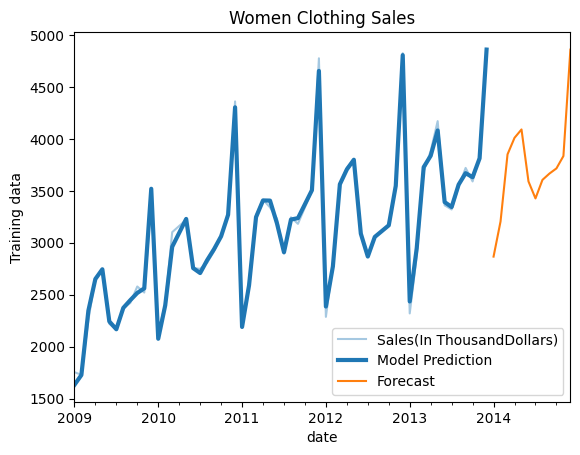

In [655]:
import matplotlib.pyplot as plt
# Plotting
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='Training data')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Prediction", color='C0')
y_fore[0].plot(label='Forecast')

# Adding legend
ax.legend()

# Show plot
plt.show()


In [656]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))

RSME train:  51.747120804151805


In [657]:
y_fore_women_clothing = y_fore.rename(columns={0:'Sales(In ThousandDollars)'})
y_fore_women_clothing['ProductCategory'] = pd.Series(['WomenClothing' for x in range(len(y_fore_women_clothing.index))], index=y_fore_women_clothing.index)
y_fore_women_clothing

,Sales(In ThousandDollars),ProductCategory
2014-01,2866.700939,WomenClothing
2014-02,3204.984348,WomenClothing
2014-03,3850.568714,WomenClothing
2014-04,4009.531379,WomenClothing
2014-05,4090.210640,WomenClothing
2014-06,3589.939498,WomenClothing
2014-07,3426.618295,WomenClothing
2014-08,3605.119827,WomenClothing
2014-09,3665.773868,WomenClothing
2014-10,3715.290220,WomenClothing


# Predicitng Men Clothing Sales

In [658]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=men_clothing_data.index,
    constant=True,
    order=1,
    seasonal=True,  
    #additional_terms=[fourier],
    drop=True,
)
X_1 = dp.in_sample() 
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_men, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [659]:
men_clothing_features_selected = combined[['Temp avg (°C)', 'Dew Point avg (°C)', 'Events']]
X_2 = men_clothing_features_selected.loc['2009-01':'2013-12']

X_2_fore = men_clothing_features_selected.loc['2014-01':'2014-12']
X_2.drop(idx_men, inplace=True)

/tmp/ipykernel_137204/2520001283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_men, inplace=True)


In [660]:
model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [661]:
y = men_clothing_data['Sales(In ThousandDollars)'].drop(idx_men)
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

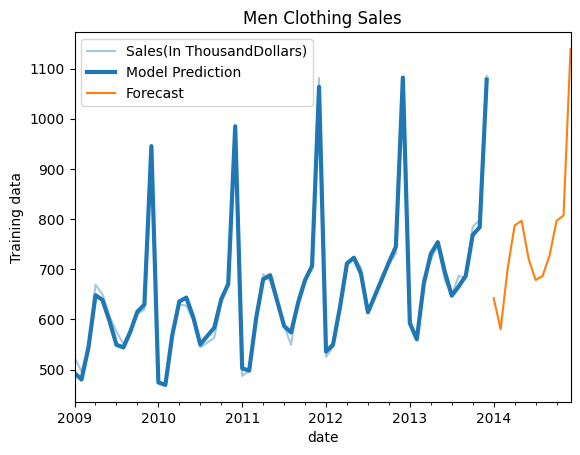

In [662]:
import matplotlib.pyplot as plt
# Plotting
ax = y.plot(alpha=0.4, title="Men Clothing Sales", ylabel='Training data')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Prediction", color='C0')
y_fore[0].plot(label='Forecast')

# Adding legend
ax.legend()

# Show plot
plt.show()


In [663]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))

RSME train:  11.473245995743262


In [664]:
y_fore_men_clothing = y_fore.rename(columns={0:'Sales(In ThousandDollars)'})
y_fore_men_clothing['ProductCategory'] = pd.Series(['MenClothing' for x in range(len(y_fore_men_clothing.index))], index=y_fore_men_clothing.index)
y_fore_men_clothing

,Sales(In ThousandDollars),ProductCategory
2014-01,642.174068,MenClothing
2014-02,580.306271,MenClothing
2014-03,701.111000,MenClothing
2014-04,787.174881,MenClothing
2014-05,796.522525,MenClothing
2014-06,720.691949,MenClothing
2014-07,678.480565,MenClothing
2014-08,686.384678,MenClothing
2014-09,727.084808,MenClothing
2014-10,796.525949,MenClothing


# Predicting Other Clothing Sales

In [665]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=other_clothing_data.index,
    constant=True,
    order=2,
    seasonal=True,  
    #additional_terms=[fourier],
    drop=True,
)
X_1 = dp.in_sample() 
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_other, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [666]:
other_clothing_features_selected = combined[['Monthly Nominal GDP Index (inMillion$)', 'Monthly Real GDP Index (inMillion$)', 'Earnings or wages  in dollars per hour', \
                                                           'CPI', 'Events', 'unemployment rate', 'yieldperharvested acre']]
X_2 = other_clothing_features_selected.loc['2009-01':'2013-12']

X_2_fore = other_clothing_features_selected.loc['2014-01':'2014-12']
X_2.drop(idx_other, inplace=True)

/tmp/ipykernel_137204/1639235034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_other, inplace=True)


In [667]:
model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [668]:
y = other_clothing_data['Sales(In ThousandDollars)'].drop(idx_other)
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

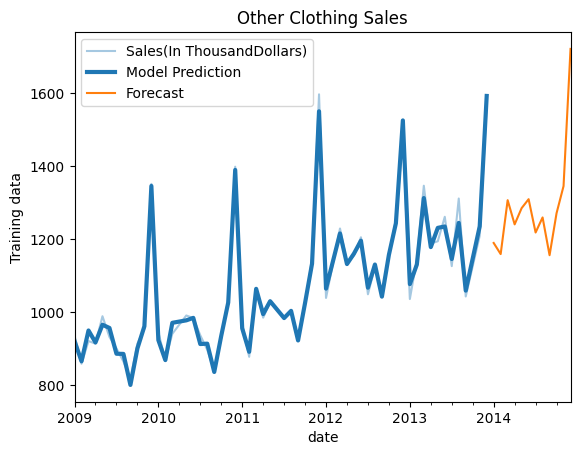

In [669]:
import matplotlib.pyplot as plt
# Plotting
ax = y.plot(alpha=0.4, title="Other Clothing Sales", ylabel='Training data')
y_pred[0].plot(ax=ax, linewidth=3, label="Model Prediction", color='C0')
y_fore[0].plot(label='Forecast')

# Adding legend
ax.legend()

# Show plot
plt.show()


In [670]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))

RSME train:  20.86480963627458


In [671]:
y_fore_other_clothing = y_fore.rename(columns={0:'Sales(In ThousandDollars)'})
y_fore_other_clothing['ProductCategory'] = pd.Series(['OtherClothing' for x in range(len(y_fore_other_clothing.index))], index=y_fore_other_clothing.index)
y_fore_other_clothing

,Sales(In ThousandDollars),ProductCategory
2014-01,1189.384576,OtherClothing
2014-02,1158.974572,OtherClothing
2014-03,1306.445299,OtherClothing
2014-04,1240.239546,OtherClothing
2014-05,1284.650811,OtherClothing
2014-06,1309.131425,OtherClothing
2014-07,1217.998636,OtherClothing
2014-08,1259.193455,OtherClothing
2014-09,1155.861866,OtherClothing
2014-10,1270.805214,OtherClothing


In [672]:
result = pd.concat([y_fore_women_clothing, y_fore_men_clothing, y_fore_other_clothing])
result['ProductCategory'].replace({'WomenClothing':0, 'MenClothing':1, 'OtherClothing':2}, inplace=True)
result.index.name = 'date'
result.sort_values(by=['date', 'ProductCategory'], inplace=True)

/tmp/ipykernel_137204/1583783536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result['ProductCategory'].replace({'WomenClothing':0, 'MenClothing':1, 'OtherClothing':2}, inplace=True)
/tmp/ipykernel_137204/1583783536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['ProductCategory']

In [673]:
result['Year'] = pd.Series([x for x in range(1, len(result.index) + 1)], index=result.index)
result

,Sales(In ThousandDollars),ProductCategory,Year
date,,,
2014-01,2866.700939,0,1
2014-01,642.174068,1,2
2014-01,1189.384576,2,3
2014-02,3204.984348,0,4
2014-02,580.306271,1,5
2014-02,1158.974572,2,6
2014-03,3850.568714,0,7
2014-03,701.111000,1,8
2014-03,1306.445299,2,9


In [674]:
submission = result[['Year', 'Sales(In ThousandDollars)']]
submission

,Year,Sales(In ThousandDollars)
date,,
2014-01,1,2866.700939
2014-01,2,642.174068
2014-01,3,1189.384576
2014-02,4,3204.984348
2014-02,5,580.306271
2014-02,6,1158.974572
2014-03,7,3850.568714
2014-03,8,701.111000
2014-03,9,1306.445299


In [675]:
submission.to_csv('submission.csv', index=False)